# Implementation for Gradient Descent for Linear Regression

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [81]:
from numpy import genfromtxt
reg_data = genfromtxt('RegData.csv', delimiter=',')

### Exploring data

In [82]:
print(reg_data)

[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [83]:
X = reg_data[:,0]
Y = reg_data[:,1]

#### Exploring data

In [84]:
print(X)

[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]


In [85]:
print(Y)

[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot for the original data (scatter plot of X,y)

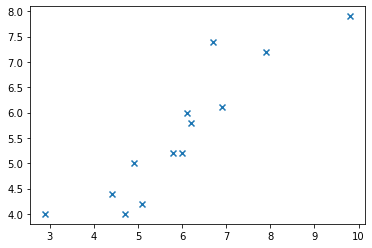

In [86]:
plt.scatter(X,Y, marker='x')
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

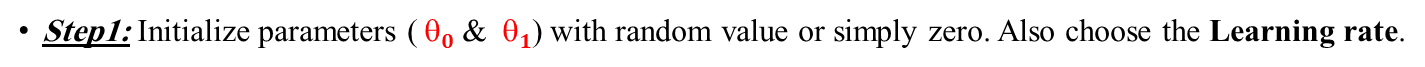

In [87]:
theta0 = 0
theta1 = 0
alpha = 0.0001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.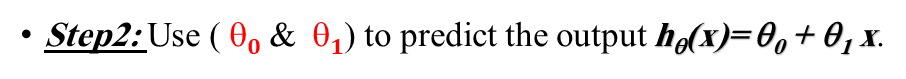


In [88]:
hypothesis = theta0 + theta1 * X

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).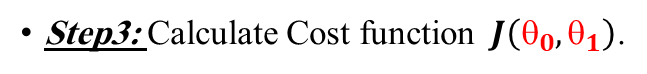
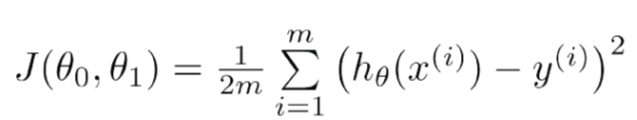

In [89]:
m = len(X)
cost = (sum((hypothesis - Y))**2)/(2*m)


### Step4: Calculate the gradient.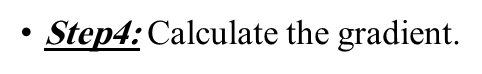
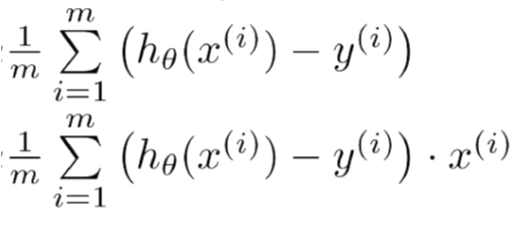

In [91]:
gradient_0 = (sum(hypothesis - Y))/m
gradient_1 = (sum(X*(hypothesis - Y)))/m
gradient_vector = np.array([gradient_0, gradient_1])
print(gradient_0, gradient_1)
print(gradient_vector)

-5.569230739769231 -35.043846043215375
[ -5.56923074 -35.04384604]


### Step5: Update the parameters (simultaneously).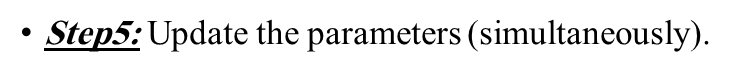
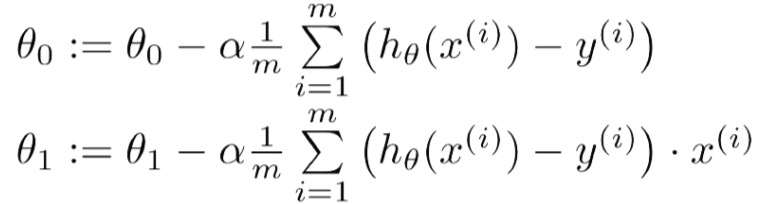

In [93]:
theta0 = theta0 - alpha * gradient_0
theta1 = theta1 - alpha * gradient_1

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.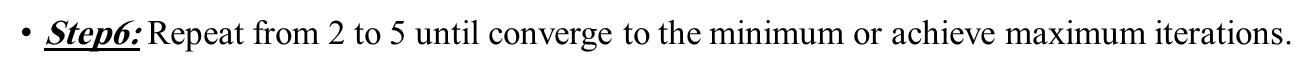

In [110]:
from numpy.linalg import norm
theta0 = 0
theta1 = 0
cost_total = []
count = 0
for i in range(1000):

    hypothesis = theta0 + theta1 * X
    cost = (sum(hypothesis - Y)**2)/(2*m)
    gradient_0 = (sum(hypothesis - Y))/m
    gradient_1 = (sum(X*(hypothesis - Y)))/m
    theta0 = theta0 - alpha * gradient_0
    theta1 = theta1 - alpha * gradient_1
    gradient_vector = np.array([gradient_0, gradient_1])
        
   
    
    if norm(gradient_vector) <= 0.001:
        break
        
    count += 1
        
print('no of epochs is ' , count)
    

no of epochs is  1000


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [111]:
y_predicted = theta0 + theta1 * X
print(y_predicted)

[2.69113899 6.02572172 4.44618267 7.07874817 8.74603975 6.20122634
 5.4992087  5.5869608  5.4114566  4.62168687 4.27067805 4.00742175
 5.2359524 ]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

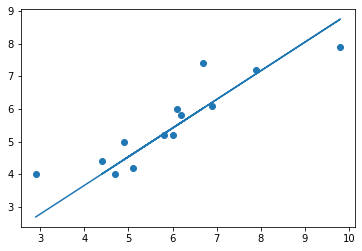

In [112]:
plt.scatter(X, Y)
plt.plot(X , y_predicted)
plt.show()

#### Use R2 score to evaluate LR equation output
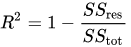
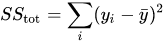
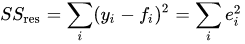
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [113]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,y_predicted)
print(r2)

0.7396433715524082


## Plot loss function
### saving loss for each iteration (epoch)

In [115]:
theta0 = 0
theta1 = 0
cost_total = []
cost_1= 1000
for i in range(1000):
    

    hypothesis = theta0 + theta1 * X
    cost = (sum(hypothesis - Y)**2)/(2*m)
    gradient_0 = (sum(hypothesis - Y))/m
    gradient_1 = (sum(X*(hypothesis - Y)))/m
    theta0 = theta0 - alpha * gradient_0
    theta1 = theta1 - alpha * gradient_1
    gradient_vector = np.array([gradient_0, gradient_1])
        
    cost_total.append(cost)
    
    
    
    if norm(gradient_vector) <= 0.001:
        break
    if abs(cost-cost_1) <= 0.001:
        break
    
    cost_1 = cost
        
print(cost_total)
    

[201.6061517131385, 200.05821857426574, 198.5222672005073, 196.99820447442957, 195.48593800374206, 193.98537611564277, 192.4964278512111, 191.0190029598421, 189.55301189372526, 188.0983658023658, 186.65497652714936, 185.22275659594814, 183.80161921777, 182.39147827744895, 180.9922483303767, 179.60384459727624, 178.2261829590147, 176.85917995145823, 175.50275276036612, 174.1568192163249, 172.82129778972188, 171.49610758575815, 170.18116833950046, 168.87640041097114, 167.5817247802771, 166.2970630427762, 165.0223374042818, 163.75747067630417, 162.50238627132967, 161.25700819813613, 160.0212610571451, 158.7950700358104, 157.5783609040421, 156.37106000966722, 155.17309427392476, 153.9843911869965, 152.8048788035722, 151.63448573845014, 150.4731411621711, 149.32077479668698, 148.17731691106275, 147.04269831721228, 145.91685036566773, 144.79970494138067, 143.69119445955764, 142.59125186152653, 141.49981061063693, 140.41680468819072, 139.34216858940556, 138.2758373194094, 137.21774638926658, 

### Plot loss vs. iterations

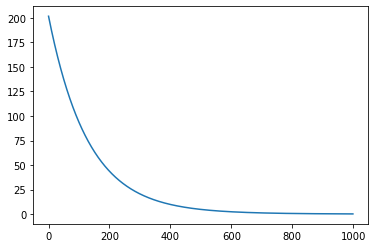

In [116]:
iterations= np.arange(1000)
plt.plot(iterations, cost_total)
plt.show()

## Multivariate LR

#### Reading MultipleLR csv file into numpy array  
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [117]:
ml_data = genfromtxt('MultipleLR.csv', delimiter=',')
print(ml_data)

[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]


In [118]:
x_=ml_data[:,:3]
x_b=np.c_[np.ones((len(x_),1)),x_]
y_=ml_data[:,3]
print(x_)
print(x_b)
print(y_)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88.  92.  86.]
 [  1.  78.  83.  77.]
 [  1.  82.  86.  90.]
 [  1.  86.  82.  89.]
 [  1.  78.  83.  85.]
 [  1.  76.  83.  71

In [119]:
theta = np.array([[0.],[0.],[0.],[0.]])

y_=np.reshape(y_, (-1, 1))
print(theta)

[[0.]
 [0.]
 [0.]
 [0.]]


In [120]:
print(y_)

[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### implementation for more than one variable

In [121]:
learning_rate=.00001
iterations = 1000
list_cost=[]
m = len(y_)
for i in range(iterations):

    h = np.dot(x_b,theta)


    cost = (1/(2*m))*np.sum((h-y_)**2)
    list_cost.append(cost)

    error = h-y_
    grad = (x_b.T@error)/m
    



    theta=theta-(alpha*grad)
    


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [122]:
y_pred=x_b@theta
print(y_pred)

[[152.87121322]
 [184.85674383]
 [181.47483649]
 [198.75052368]
 [140.34382743]
 [105.31205204]
 [150.10779197]
 [113.11610301]
 [174.37742357]
 [164.06972743]
 [143.81388672]
 [142.72273052]
 [186.36979543]
 [153.41203893]
 [151.08774876]
 [188.54161627]
 [145.10262039]
 [180.58785665]
 [177.3277855 ]
 [158.74612896]
 [175.79168644]
 [174.43302327]
 [167.19171348]
 [151.52786662]
 [190.88314212]]


### Plot loss vs. iterations

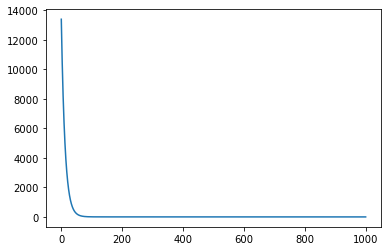

In [123]:
iter_ = np.arange(0,1000)
plt.plot(iter_, list_cost)
plt.show()

#### Use R2 score to evaluate LR equation output

In [124]:
r2_ = r2_score(y_,y_pred)
print(r2_)

0.9886850607889688



# Linear Regression Using sklearn

### Single Variable

#### Building a LR model usin linearmodel.LinearRegression() from sklearn library

In [125]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#### Train the model (fit the model to the training data)

In [126]:
X_1 = X.reshape(-1, 1)
Y_1 = Y.reshape(-1, 1)
regressor.fit(X_1, Y_1)

LinearRegression()

#### Predict y values using the trained model

In [127]:
y_pred_1 = regressor.predict(X_1)
print(y_pred_1)

[[3.44824549]
 [6.08745623]
 [4.83730388]
 [6.92089146]
 [8.240497  ]
 [6.22636227]
 [5.67073878]
 [5.74019163]
 [5.60128593]
 [4.97620959]
 [4.69839784]
 [4.49003928]
 [5.46238022]]


#### Plot model output (fitted line) with the original data (scatter plot of X,y)

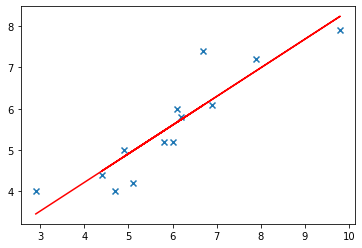

In [128]:
plt.scatter(X, Y, marker = 'x')
plt.plot(X, y_pred_1, c='red')
plt.show()

#### Use R2 score to evaluate model output

In [129]:
r2_1 = r2_score(Y, y_pred_1)

In [130]:
print(r2_1)

0.8213156778363777


### Same implementaion for Mulivariate

In [131]:
regressor.fit(x_, y_)
y_pred_ = regressor.predict(x_)
print(y_pred_)

[[152.60720439]
 [185.08011472]
 [181.78158547]
 [199.74522647]
 [139.1747207 ]
 [103.69391793]
 [150.2632274 ]
 [112.82069728]
 [174.55948394]
 [164.49442094]
 [143.42337551]
 [142.23416416]
 [186.54285759]
 [152.40794527]
 [151.24409108]
 [189.12496613]
 [143.50219218]
 [181.89389361]
 [177.29838914]
 [158.34934019]
 [176.57742415]
 [174.66365778]
 [167.68889392]
 [150.63279846]
 [191.1954116 ]]


In [132]:
r2_2 = r2_score(y_, y_pred_)
print(r2_2)

0.9896615789448399
